In [1]:
# use this block to import all necessary libs
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# use this block to import all the necessary modules
from engine import Value, build_topological_sort
from nn import Neuron, Layer, MLP
from graphviz import Digraph
from graph import draw_dot, draw_nn

In [3]:
# define the function f(x) = 3x^2 - 4x + 5
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

20.0

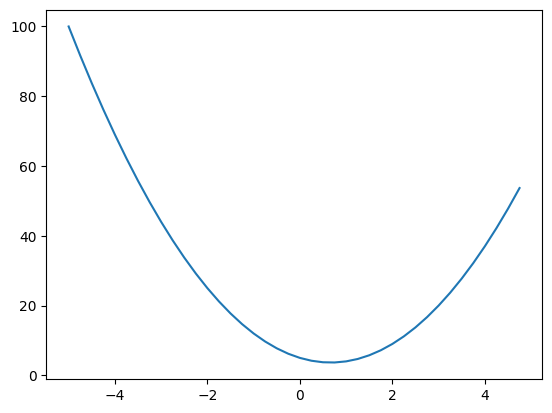

In [4]:
xs = np.arange(-5, 5, 0.25) # create a list of x values
ys = f(xs) # calculate the y values for each x
plt.plot(xs, ys) # plot the x and y values


In [5]:
# calculate the derivative of f(x) at x = 3.0
h = 0.00000001
x = 3.0
f(x)
f(x+h)
f(x+h) - f(x)
(f(x+h) - f(x)) / h

14.00000009255109

In [6]:
# derivative step
h = 0.00001

#inputs
a = 2
b = -3
c = 10

# derivative of function that is d = a*b+c with respect to a
d1 = a * b + c # first value
a += h # increment a
d2 = a * b + c # second value
print("d1", d1)
print("d2", d2)
print("slope with respect to a", (d2 - d1) / h)

# derivative of function that is d = a*b+c with respect to b
d1 = a * b + c # first value
b += h # increment b
d2 = a * b + c # second value
print("d1", d1)
print("d2", d2)
print("slope with respect to b", (d2 - d1) / h)

# derivative of function that is d = a*b+c with respect to c
d1 = a * b + c # first value
c += h # increment c
d2 = a * b + c # second value
print("d1", d1)
print("d2", d2)
print("slope with respect to c", (d2 - d1) / h)

d1 4
d2 3.9999699999999994
slope with respect to a -3.000000000064062
d1 3.9999699999999994
d2 3.9999900000999995
slope with respect to b 2.00001000001393
d1 3.9999900000999995
d2 4.000000000099999
slope with respect to c 0.9999999999621422


using engine and graph from this point on

Value(data=-8.0)


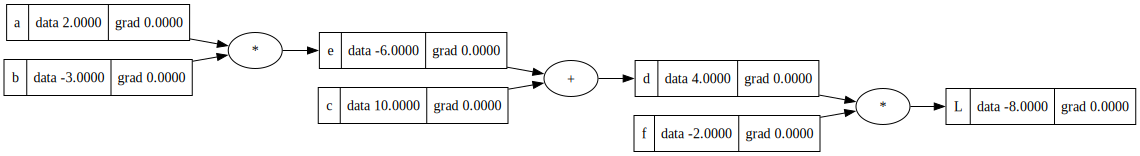

In [7]:
# define the variables
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label="e"
d = e + c; d.label="d"
f = Value(-2, label='f')
L = d * f; L.label="L"

# print the result and draw the dot
print(L)
draw_dot(L)


back propagation and chain rule

how does output L changes when d is infitesimally changed

dL / dd = f

multiplication node takes the other component as the derivative

plus node just back propagates the derivative of the node in front

how does L change with respect to change in c

dL / dc = (dL / dd) * (dd / dc)  # chain rule of calculus

if a car is moving 2 times as fast a bike and the bike is moving 4 times as fast as a person, then the car is moving 8 times as fast as the man. 

In [8]:
def lol():
	h = 0.0001

	a = Value(2.0, label='a')
	b = Value(-3.0, label='b')
	c = Value(10.0, label='c')
	e = a * b; e.label="e"
	d = e + c; d.label="d"
	f = Value(-2, label='f')
	L = d * f; L.label="L"
	L0 = L.data

	a = Value(2.0 + h, label='a') # increment a
	b = Value(-3.0, label='b')
	c = Value(10.0, label='c')
	e = a * b; e.label="e"
	d = e + c; d.label="d"
	f = Value(-2, label='f')
	L = d * f; L.label="L"
	L1 = L.data

	da = (L1 - L0) / h # calculate the slope of L with respect to a

	print("da", da)

	a = Value(2.0, label='a')
	b = Value(-3.0 + h, label='b') # increment b
	c = Value(10.0, label='c')
	e = a * b; e.label="e"
	d = e + c; d.label="d"
	f = Value(-2, label='f')
	L = d * f; L.label="L"
	L2 = L.data

	db = (L2 - L0) / h # calculate the slope of L with respect to b

	print("db", db)

	a = Value(2.0, label='a')
	b = Value(-3.0, label='b')
	c = Value(10.0 + h, label='c') # increment c
	e = a * b; e.label="e"
	d = e + c; d.label="d"
	f = Value(-2, label='f')
	L = d * f; L.label="L"
	L3 = L.data

	dc = (L3 - L0) / h # calculate the slope of L with respect to c

	print("dc", dc)

	a = Value(2.0, label='a')
	b = Value(-3.0, label='b')
	c = Value(10.0, label='c')
	e = a * b; e.label="e"
	d = e + c; d.label="d"
	d.data += h # increment d
	f = Value(-2, label='f')
	L = d * f; L.label="L"
	L4 = L.data

	dd = (L4 - L0) / h # calculate the slope of L with respect to d

	print("dd", dd)

	a = Value(2.0, label='a')
	b = Value(-3.0, label='b')
	c = Value(10.0, label='c')
	e = a * b; e.label="e"
	e.data += h # increment e
	d = e + c; d.label="d"
	f = Value(-2, label='f')
	L = d * f; L.label="L"
	L5 = L.data

	de = (L5 - L0) / h # calculate the slope of L with respect to e

	print("de", de)

	a = Value(2.0, label='a')
	b = Value(-3.0, label='b')
	c = Value(10.0, label='c')
	e = a * b; e.label="e"
	d = e + c; d.label="d"
	f = Value(-2 + h, label='f')
	L = d * f; L.label="L"
	L6 = L.data

	df = (L6 - L0) / h # calculate the slope of L with respect to f

	print("df", df)

lol()

da 6.000000000021544
db -4.000000000008441
dc -1.9999999999953388
dd -1.9999999999953388
de -1.9999999999953388
df 3.9999999999995595


In [9]:

# define the variables
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label="e"
d = e + c; d.label="d"
f = Value(-2, label='f')
L = d * f; L.label="L"

da = 6.0
db = -4.0
dc = -2.0
dd = -2
de = -2
df = 4

# lets put grad to the variables
a.grad = da
b.grad = db
c.grad = dc
d.grad = dd
e.grad = de
f.grad = df

def step():
	step_size = 0.01
	# if we nudge all the inputs in the direction of the gradient, the output will change in the direction of the gradient
	a.data += a.grad * step_size
	b.data += b.grad * step_size
	c.data += c.grad * step_size
	f.data += f.grad * step_size

	e = a * b
	d = e + c
	L = d * f

	print("L", L.data)
	draw_dot(L)

for i in range(10):
	step()

L -7.286496
L -6.586368000000001
L -5.900192000000001
L -5.228544
L -4.572000000000001
L -3.9311360000000013
L -3.306528000000002
L -2.6987520000000007
L -2.108384000000003
L -1.536000000000001


example with a neuron

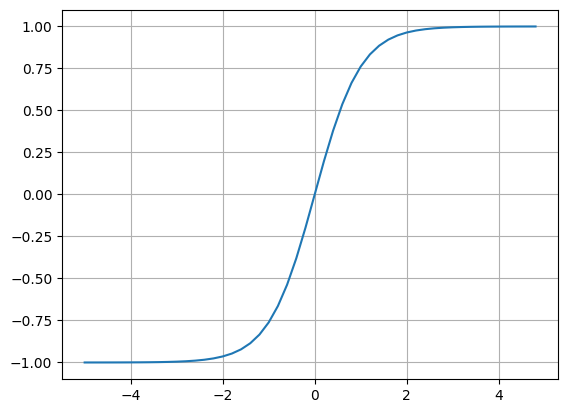

In [10]:
data = np.arange(-5, 5, 0.2)
squash = np.tanh(data)
plt.plot(data, squash)
plt.grid()


lets draw a neuron

w1x1 + w2x2 +b

2 inputs x1, x2 each has their own weight
b is bias of neuron


In [11]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias
b = Value(6.881373, label='b')

#neuron
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1+x2w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'




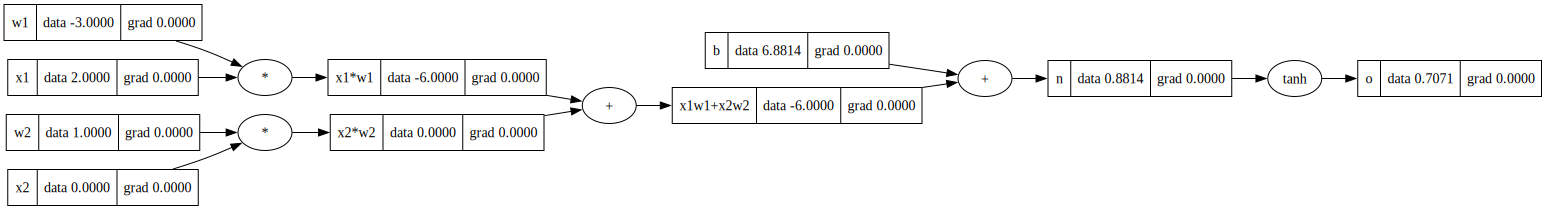

In [12]:
draw_dot(o)

In [13]:
o.grad = 1.0

# o = tanh(n)
# do/dn = 1 - tanh(n)**2 = 1 - o**2


In [14]:
# gradient of o with respect to n
dodn = 1 - o.data**2

n.grad = dodn


In [15]:
b.grad = n.grad
x1w1x2w2.grad = n.grad

In [16]:
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad


In [17]:
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data

x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data



now back propagate with _backward callbacks

In [18]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias
b = Value(6.881373, label='b')

#neuron
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1+x2w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

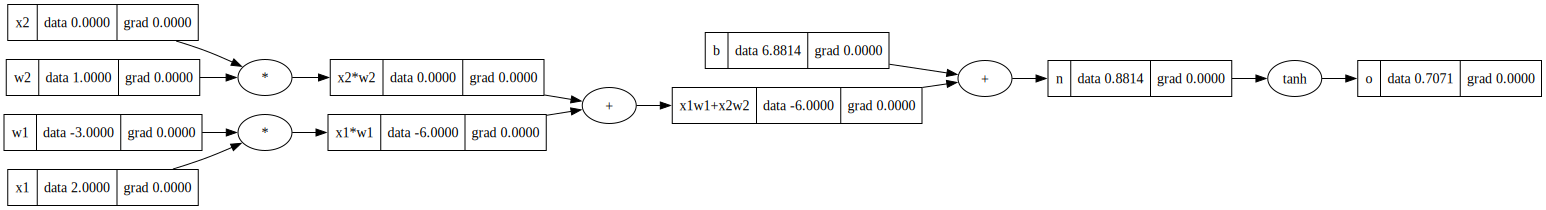

In [19]:
draw_dot(o)

In [20]:
o.grad = 1.0
o._backward()
n._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
b._backward()



now lets do the entire back propagation automatically

In [21]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias
b = Value(6.881373, label='b')

#neuron
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1+x2w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

In [22]:
o.grad = 1.0

nodes = build_topological_sort(o)
for node in reversed(nodes):
	node._backward()


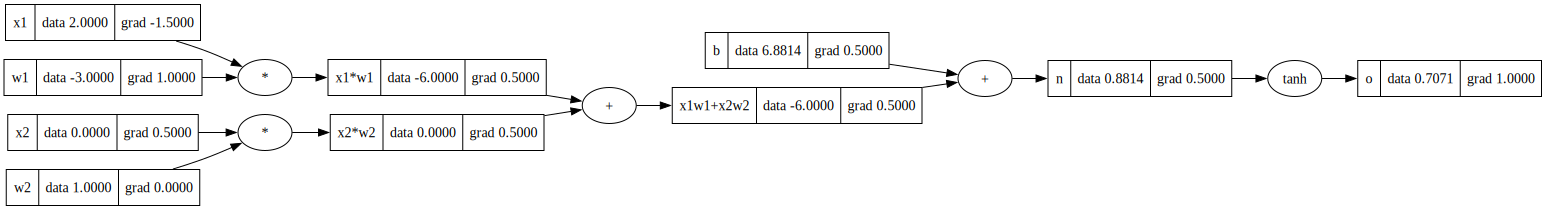

In [23]:
draw_dot(o)

lets called the native function now

In [24]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias
b = Value(6.881373, label='b')

#neuron
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1+x2w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

In [25]:
o.backward()

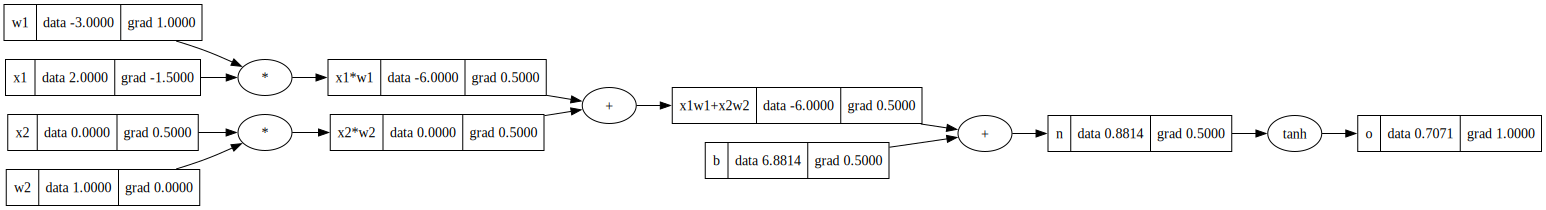

In [26]:
draw_dot(o)

there is a bug. if a variable is used more than once, its grad is overwritten. the logic does not consider use of variable in multiple places in graph. the solution is to accumulate the gradients rather than setting

In [27]:
a = Value(10)
2 + a

Value(data=12)

we are gonna write tanh explicitly

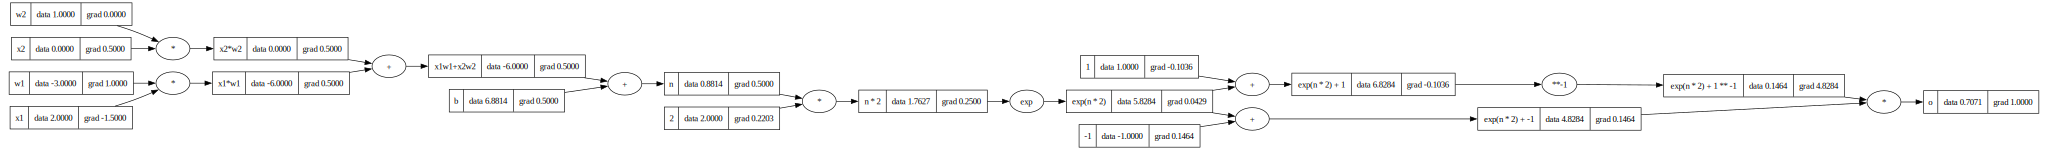

In [28]:
#inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias
b = Value(6.881373, label='b')

#neuron
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1+x2w2'

n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e-1) / (e+1)
o.label = 'o'

o.backward()
draw_dot(o)


In [29]:
import torch

x1 = torch.tensor(2.0, dtype=torch.float64, requires_grad=True)
x2 = torch.tensor(0.0, dtype=torch.float64, requires_grad=True)
w1 = torch.tensor(-3.0, dtype=torch.float64, requires_grad=True)
w2 = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)
b = torch.tensor(6.881373, dtype=torch.float64, requires_grad=True)

n = x1*w1 + x2*w2 + b
o=torch.tanh(n)

o.backward()

print("o", o.item())
print("x1.grad", x1.grad.item())
print("x2.grad", x2.grad.item())
print("w1.grad", w1.grad.item())
print("w2.grad", w2.grad.item())
print("b.grad", b.grad.item())


o 0.7071064876766542
x1.grad -1.500001245256757
x2.grad 0.5000004150855857
w1.grad 1.0000008301711714
w2.grad 0.0
b.grad 0.5000004150855857


mlp


In [30]:
#first ever nn
# 3 inputs, 2 hidden layers with 4 neurons each, 1 output
x = [Value(1.2, label='x1'), Value(-0.7, label='x2'), Value(0.3, label='x3')]
layers = [3, 3, 1] # 2 hidden layers with 4 neurons each, 1 output
model = MLP(3, layers, method='tanh', nonlin=True)
out = model(x)
loss = out[0] if isinstance(out, list) else out
loss.backward()


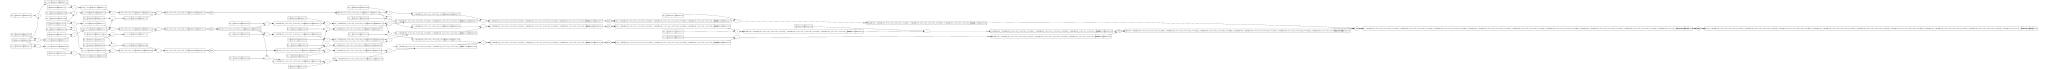

In [31]:
draw_dot(loss)

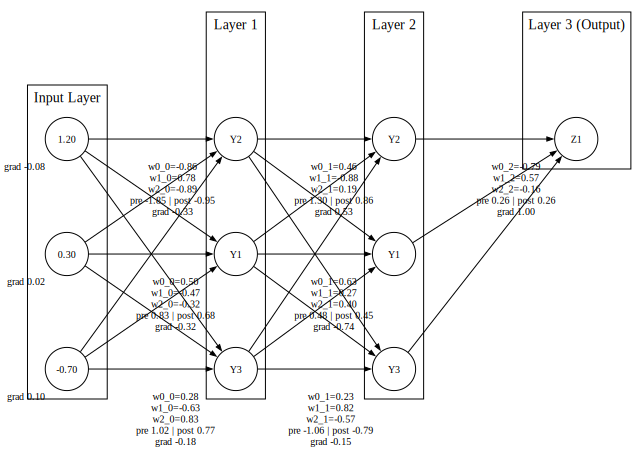

In [34]:
dot = draw_nn(model, show_weights='both', weight_position='neuron', show_node_values=True)
display(dot)